# Image Preprocessing and Binary Classification with Keras

## Objective

In this week's exercise, you will:
1. Learn how to do image preprocessing in Keras
2. Build a multilayer neural network for binary classification
3. Train the model on a real-world dataset of cats and dogs
4. Monitor performance using a validation dataset

---

## Step 1: Import Libraries

Let's start by importing the necessary libraries.

In [14]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, Rescaling
import matplotlib.pyplot as plt

---

## Step 2: Load and Preprocess the Data

Use `tfds.load()` to load the "cats_vs_dogs" dataset.

Find a way to split the dataset into a training and a validation set.

Also research how to apply necessary preprocessing to the data and do so (some of the preprocessing can also later be done using layers of the model).

*Note*: You can also get the dataset from other sources. However, there are some known issues with corrupted images, which then need to be addressed.

In [19]:
# TODO: load the dataset
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True,split=['train[:80%]', 'train[80%:]'])

train_dataset = dataset[0]
test_dataset = dataset[1]

print(info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/home/codespace/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and D

Image shape: (262, 350, 3)
Label: tf.Tensor(1, shape=(), dtype=int64)


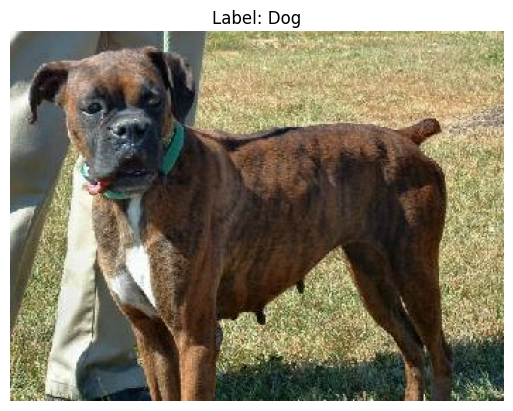

2025-05-12 07:26:52.076489: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
# Beispiel aus dem Datensatz anzeigen


for image, label in train_dataset.take(1):
    print("Image shape:", image.shape)
    print("Label:", label)
    
     # Display the image
    plt.imshow(image)
    plt.title("Label: " + ("Dog" if label.numpy() == 1 else "Cat"))
    plt.axis('off')
    plt.show()

In [21]:
#preprocess the data before feeding it to the model
def preprocess(image, label):
    # Resize the image to 150x150 pixels
    image = tf.image.resize(image, (150, 150))
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0
    return image, label

# Apply the preprocessing function to the datasets
train_dataset = train_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


Preprocessed Image shape: (32, 150, 150, 3)
Label: tf.Tensor([1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1], shape=(32,), dtype=int64)


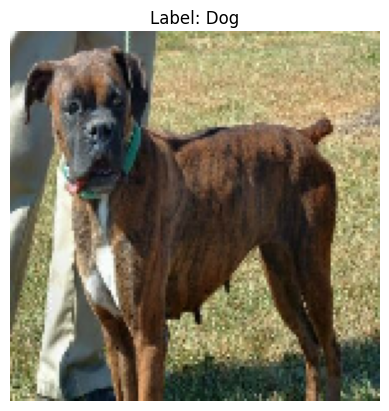

In [23]:
#print example of preprocessed data
for image, label in train_dataset.take(1):
    print("Preprocessed Image shape:", image.shape)
    print("Label:", label)
    
     # Display the image
    plt.imshow(image[0])
    plt.title("Label: " + ("Dog" if label[0].numpy() == 1 else "Cat"))
    plt.axis('off')
    plt.show()

---

## Step 3: Build a Multilayer Neural Network

Build a multilayer neural network for binary classification. Apply your knowledge from the Coursera lectures to choose an adequate model architecture.

In [25]:
# TODO build a model
model = Sequential([
    Input(shape=(150, 150, 3)), #input shape of the images
    Conv2D(32, (3, 3), activation='relu'), #first convolutional layer with 32 filters to learn 3x3 features
    MaxPooling2D(pool_size=(2, 2)), #first pooling layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

#compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

---

## Step 4: Train the Model

Train the model using the training dataset you created. Monitor performance during training using the validation dataset.

In [28]:
# TODO: train the model

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, verbose=2)


Epoch 1/10
582/582 - 260s - 446ms/step - accuracy: 0.8297 - loss: 0.3786 - val_accuracy: 0.8078 - val_loss: 0.4241
Epoch 2/10
582/582 - 260s - 447ms/step - accuracy: 0.8633 - loss: 0.3154 - val_accuracy: 0.8080 - val_loss: 0.4359
Epoch 3/10
582/582 - 262s - 449ms/step - accuracy: 0.8902 - loss: 0.2612 - val_accuracy: 0.8098 - val_loss: 0.4256
Epoch 4/10
582/582 - 260s - 447ms/step - accuracy: 0.9096 - loss: 0.2161 - val_accuracy: 0.8231 - val_loss: 0.4460
Epoch 5/10
582/582 - 261s - 448ms/step - accuracy: 0.9249 - loss: 0.1845 - val_accuracy: 0.8102 - val_loss: 0.5193
Epoch 6/10


2025-05-12 08:20:04.698894: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 8640256 bytes after encountering the first element of size 8640256 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


582/582 - 261s - 449ms/step - accuracy: 0.9447 - loss: 0.1431 - val_accuracy: 0.8136 - val_loss: 0.5343
Epoch 7/10
582/582 - 262s - 449ms/step - accuracy: 0.9520 - loss: 0.1235 - val_accuracy: 0.8085 - val_loss: 0.6354
Epoch 8/10
582/582 - 268s - 461ms/step - accuracy: 0.9545 - loss: 0.1164 - val_accuracy: 0.8194 - val_loss: 0.6457
Epoch 9/10
582/582 - 262s - 450ms/step - accuracy: 0.9637 - loss: 0.0932 - val_accuracy: 0.8276 - val_loss: 0.6899
Epoch 10/10
582/582 - 268s - 460ms/step - accuracy: 0.9687 - loss: 0.0824 - val_accuracy: 0.8188 - val_loss: 0.7773


---

## Step 5: Evaluate the Model

After training, you may upload some test images to evaluate your model.

In [33]:
import os
from tensorflow.keras.preprocessing import image

def load_and_predict(model, image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0

    # Predict the class
    classes = model.predict(x)
    result = "a dog" if classes[0] > 0.5 else "a cat"
    print(f'The model predicts that the image is of {result}')


# Call the function to upload images and get predictions
image_path = './example_image/cat1.jpg'  # Replace with your image path
load_and_predict(model, image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
The model predicts that the image is of a cat
